# Wiskunde II: Portfolio

Datum van inleveren: 16-6-2023<br>
Vak: Wiskunde II<br>
Groepsnummer: 11<br>
Leden:<br>
- Busse Heemskerk
- Jesse van Leeuwen
- Yara Passchier


---

## Inhoud <a name = 'begin'></a>

1. [De class, WisHelper](#WisHelper)
1. [Deel A](#deela)
    1. [Analyse van 5 kolommen](#analys)
        1. [Geslacht](#geslacht)
        2. [Hoogste opleiding](#hopl)
        3. [Leeftijd](#age)
        4. [BMI](#bmi)
        5. [Werkeloos](#werkeloos)
    2. [Tabel van kengetallen en grafieken](#tabel)
    3. [Analyse van een binaire kolom](#rokers)
    4. [Discrete en continue verdelingen](#cholesterol)
    5. [Correlaties tussen kolommen](#corr_1)
2. [Deel B](#deelb)
    1. [Basiswaarden samengestelde variabele](#bas)
    2. [Het maken van Mental_Health](#mental)
    3. [](#)
3. [Deel C](#deelc)
    1. [Het lineaire verband](#lineair)
    2. [Onderzoek van Cholesterolwaarde](#cho)
        1. [Kans op hoge cholesterol](#kans)
        2. [Eerste test](#test1)
        2. [Betrouwbaarheidsintervallen](#betr)
        3. [Tweede test](#test2)
    3. [Onderzoeken van diastolische bloeddruk](#bloed)
    4. [Suikerziekte en BMI](#suiker)

--------------------

## Importeren van de dataset en modules

Eerst worden de benodigde modules geïmporteerd en de dataset wordt ingeladen.

In [1]:
# Importeren van libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Zetten van grafiek stijl naar darkgrid
sns.set_style('darkgrid')

In [2]:
# Inlezen van het CSV bestand
df = pd.read_csv('wisk2SPSSdatafile_def.csv')
display(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Geslacht                       400 non-null    int64  
 1   Leeftijd                       400 non-null    int64  
 2   Hoogste_opleiding              400 non-null    int64  
 3   Roker                          400 non-null    int64  
 4   Sigaretten_per_dag             400 non-null    int64  
 5   Bloeddrukmedicatie             400 non-null    object 
 6   Hersenbloeding                 400 non-null    int64  
 7   Hoge_bloeddruk                 400 non-null    int64  
 8   Suikerziekte                   400 non-null    int64  
 9   Cholesterolwaarde              400 non-null    int64  
 10  Bloeddruk_systolisch           400 non-null    float64
 11  Bloeddruk_diastolisch          400 non-null    float64
 12  BMI_waarde                     400 non-null    flo

,Geslacht,Leeftijd,Hoogste_opleiding,Roker,Sigaretten_per_dag,Hersenbloeding,Hoge_bloeddruk,Suikerziekte,Cholesterolwaarde,Bloeddruk_systolisch,...,Fysieke_gezondheid,Mentale_gezondheid,Kinderen,Autobezit,Sociaal_functioneren,Empatisch_reageren,Positieve_levenshouding,Mentale_vaardigheden,Leven_in_balans,Persoonlijke_grenzen
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.405000,49.600000,1.975000,0.477500,9.490000,0.0025,0.300000,0.030000,237.482500,132.225000,...,2.877500,4.797500,0.29250,0.38750,2.892500,2.597500,3.065000,2.732500,3.092500,2.770000
std,0.491507,8.881001,1.032978,0.500119,12.724964,0.0500,0.458831,0.170801,43.296665,22.392363,...,1.109311,1.029146,0.45548,0.48779,1.210209,1.154915,1.272723,1.244917,1.306987,1.255404
min,0.000000,34.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,129.000000,94.000000,...,1.000000,2.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,207.000000,116.000000,...,2.000000,4.000000,0.00000,0.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.0000,0.000000,0.000000,238.000000,128.000000,...,3.000000,5.000000,0.00000,0.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.0000,1.000000,0.000000,265.000000,144.000000,...,4.000000,6.000000,1.00000,1.00000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,1.000000,68.000000,4.000000,1.000000,60.000000,1.0000,1.000000,1.000000,464.000000,215.000000,...,5.000000,6.000000,1.00000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


None

Er is een waarde van de kolom Bloeddrukmedicatie die later kan zorgen voor problemen. Deze kolom wordt eerst verder onderzocht en daarna mogelijk vervangen.

In [3]:
print(type(df['Bloeddrukmedicatie'][0]))
print(df['Bloeddrukmedicatie'].value_counts())

<class 'str'>
0         383
1          16
#NULL!      1
Name: Bloeddrukmedicatie, dtype: int64


Schijnbaar zijn alle waardes in deze kolom strings. Deze worden nu omgezet naar integers om mee te kunnen rekenen indien nodig. Ook voor de kolommen 'Mentale_gezondheid' en 'Persoonlijke_grenzen' kloppen de schalen niet. Dit zal worden aangepast.

In [4]:
# Vervangen van #NULL! en verkeerde waardes
df.Bloeddrukmedicatie.replace(('#NULL!', '0', '1'), (0, 0, 1), inplace=True)
df.Mentale_gezondheid.replace((2, 3, 4, 5, 6), (1, 2, 3, 4, 5), inplace=True)
df.Persoonlijke_grenzen.replace(0, 1, inplace=True)

# Opnieuw tonen van .describe() en .info()
display(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Geslacht                       400 non-null    int64  
 1   Leeftijd                       400 non-null    int64  
 2   Hoogste_opleiding              400 non-null    int64  
 3   Roker                          400 non-null    int64  
 4   Sigaretten_per_dag             400 non-null    int64  
 5   Bloeddrukmedicatie             400 non-null    int64  
 6   Hersenbloeding                 400 non-null    int64  
 7   Hoge_bloeddruk                 400 non-null    int64  
 8   Suikerziekte                   400 non-null    int64  
 9   Cholesterolwaarde              400 non-null    int64  
 10  Bloeddruk_systolisch           400 non-null    float64
 11  Bloeddruk_diastolisch          400 non-null    float64
 12  BMI_waarde                     400 non-null    flo

,Geslacht,Leeftijd,Hoogste_opleiding,Roker,Sigaretten_per_dag,Bloeddrukmedicatie,Hersenbloeding,Hoge_bloeddruk,Suikerziekte,Cholesterolwaarde,...,Fysieke_gezondheid,Mentale_gezondheid,Kinderen,Autobezit,Sociaal_functioneren,Empatisch_reageren,Positieve_levenshouding,Mentale_vaardigheden,Leven_in_balans,Persoonlijke_grenzen
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.405000,49.600000,1.975000,0.477500,9.490000,0.040000,0.0025,0.300000,0.030000,237.482500,...,2.877500,3.797500,0.29250,0.38750,2.892500,2.597500,3.065000,2.732500,3.092500,2.772500
std,0.491507,8.881001,1.032978,0.500119,12.724964,0.196205,0.0500,0.458831,0.170801,43.296665,...,1.109311,1.029146,0.45548,0.48779,1.210209,1.154915,1.272723,1.244917,1.306987,1.250862
min,0.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,129.000000,...,1.000000,1.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,207.000000,...,2.000000,3.000000,0.00000,0.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,238.000000,...,3.000000,4.000000,0.00000,0.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.0000,1.000000,0.000000,265.000000,...,4.000000,5.000000,1.00000,1.00000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,1.000000,68.000000,4.000000,1.000000,60.000000,1.000000,1.0000,1.000000,1.000000,464.000000,...,5.000000,5.000000,1.00000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


None

[Terug naar het begin](#begin)

--------------------

# De class, WisHelper <a name='WisHelper'></a>

Om te helpen met code die vaker voor komt in het notebook word er gebruik gemaakt van OOP. De class die daarmee is ontstaan is WisHelper, hiervan is de code en de uitleg in de onderstaande cel verwerkt.

In [5]:
class WisHelper:
    """
    Een class voor dit wiskunde portfolio

    Attributes:
    --------------------
    df : pandas.DataFrame
        Het dataframe waarop je de code toepast

    Methods:
    --------------------
    def verdeling_d(self, column, dictionary):
        Deze methode bekijkt de verdeling van
        een nominale of ordinale variabele.
    
    def verdeling_c(self, column, th=0.5)
        Deze methode bekijkt de scheefheid van de
        data in een gegeven kolom
    
    def corr(self, corr_type, col1, col2):
        Deze methode berekent de correlatie via de
        methode van spearman, pearson of kendall voor
        2 gegeven kolommen.
    
    def one_sample_t(self, col, mu, alpha=0.05):
        Berekent de p-waarde aan de hand van
        een one-sample t-test. Deze p-waarde toont
        of de nulhypothese verworpen kan worden, 
        door deze te vergelijken met de alpha

    def b_interval(self, alpha, mu, sigma, n):
        Berekent het betrouwbaarheids interval op basis
        van de alpha, mu, sigma en n waardes.
    """

    def __init__(self, df):
        """
        De constructor, maakt een dataframe aan
        binnen de class
        
        Parameters:
        --------------------
        self :
            De instantie van de class
        
        df : pandas.DataFrame
            Het dataframe waarop je de code toepast
        """

        self.data = df
        self.dfstat = pd.DataFrame({
            'Mode': df.mode().iloc[0],
            'Median': df.median(),
            'IQR': df.quantile(0.75) - df.quantile(0.25),
            'Mean': df.mean(),
            'Std': df.std()
        })
        self.dfstat.columns = ['Mode', 'Median', 'IQR', 'Mean', 'Std']
        self.dfstat.index = df.columns

    def verdeling_d(self, column, dictionary=None):
        """
        Deze methode bekijkt de verdelingvan
        een nominale of ordinale variabele.

        Parameters:
        --------------------
        self :
            De instantie van de class

        column : str
            De kolom die wordt bekeken
            
        dictionary : dict
            Een dictionary met de keys als
            nummers voor x-ticks en de values
            als de nieuwe labels
        """
        
        # Visualiseren van de verdeling
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.data, x=column)
        plt.xlabel(f'{column}')
        plt.ylabel('Aantal waarnemingen')
        if dictionary != None:
            plt.xticks(list(dictionary.keys()), list(dictionary.values()))
        plt.title(f'Verdeling van {column}')
        plt.show()

    def verdeling_c(self, column, th=0.5):
        """
        Deze methode bekijkt de scheefheid van de
        data in een gegeven kolom. Deze kolom heeft
        een continue waarde.

        Parameters:
        --------------------
        self :
            De instantie van de class

        column : str
            De kolom die wordt bekeken
            
        th : float (default = 0.5)
            De grenswaarde waarmee gekeken wordt
            of een kolom scheef of normaal is verdeeld
        """
        
        # Bepalen van de scheefheid
        skewness = self.data[column].skew()

         # If-statement voor de verdelings-type
        if abs(skewness) <= th:
            skewness_type = "Normaal-verdeeld"
        elif skewness > 0:
            skewness_type = "Rechts-scheef"
        else:
            skewness_type = "Links-scheef"

        # Printen van de skewness
        print(f"Skewness type: {skewness_type}")
        print(f"Skewness waarde: {skewness}")

        # Visualiseren van de verdeling
        plt.figure(figsize=(8, 6))
        sns.histplot(self.data[column], kde=True)
        plt.xlabel(f"Waardes van {column}")
        plt.ylabel("Frequentie")
        plt.title(f"Verdeling van {column}")
        plt.show()
        
    def corr(self, corr_type, col1, col2):
        """
        Deze methode berekent de correlatie via de
        methode van spearman, pearson of kendall voor
        2 gegeven kolommen.
        
        Parameters:
        --------------------
        self :
            De instantie van de class
        
        corr_type : str
            De type correlatie die wordt berekent. Er is
            keuze uit spearman, pearson of kendall
            
        col1 : str
            De naam van kolom A
            
        col2 : str
            De naam van kolom B
        """
        
        # Als corr_type spearman is, bereken spearmans r
        if corr_type == 'spearman':
            spearman_correlation, p_value = stats.spearmanr(self.data[col1], self.data[col2])
            print(f"Spearman correlatie tussen {col1} en {col2}: {spearman_correlation}\nP-waarde: {p_value}")
            
        # Als corr_type pearson is, bereken pearsons r
        elif corr_type == 'pearson':
            pearson_correlation, p_value = stats.pearsonr(self.data[col1], self.data[col2])
            print(f"Pearson correlatie tussen {col1} en {col2}: {pearson_correlation}\nP-waarde: {p_value}")
            
        # Als corr_type kendall is, bereken kendalls tau
        elif corr_type == 'kendall':
            kendall_correlation, p_value = stats.kendalltau(self.data[col1], self.data[col2])
            print(f"Kendall correlatie tussen {col1} en {col2}: {kendall_correlation}\nP-waarde: {p_value}")
            
        else:
            raise ValueError(f"De waarde {corr_type} kan niet worden gebruikt, u kan kiezen uit: spearman, pearson of kendall")
        
    def one_sample_t(self, col, mu, alpha=0.05):
        """
        Berekent de p-waarde aan de hand van
        een one-sample t-test. Deze p-waarde toont
        of de nulhypothese verworpen kan worden, 
        door deze te vergelijken met de alpha
        
        Parameters:
        --------------------
        self :
            De instantie van de class
        
        col : str
            Een kolom uit de dataset die als sample
            wordt genomen
            
        mu : int or float
            Het populatiegemiddelde
            
        alpha : float (default = 0.05)
            De grenswaarde waarop gebaseerd wordt
            of de p-waarde de nulhypothese verwerpt
        """
        
        # Bepaal de p_waarde
        t_waarde, p_waarde = stats.ttest_1samp(self.data[col], mu)

        # Bekijk de resultaten
        if p_waarde < alpha:
            print('De nulhypothese wordt verworpen omdat de '
                    f'P-waarde {p_waarde} kleiner is dan alpha {alpha}')
        else:
            print('De nulhypothese wordt behouden omdat de '
                    f'P-waarde {p_waarde} groter is dan alpha {alpha}')
    
    def b_interval(self, alpha, X, s, n):
        """
        Berekent het betrouwbaarheids interval op basis
        van de alpha, mu, sigma en n waardes.
        
        Parameters:
        --------------------
        self :
            De instantie van de class
            
        alpha : float
            De waarde van alpha, bijv 0.05 of 0.1
        
        X : int or float
            Het gemiddelde van de steekproef
            
        s : int or float
            De standaard deviatie van de steekproef
        
        n : int
            Het aantal waarnemingen van de steekproef
        """
        # Berekenen van alpha en t
        a_value = 1 - (alpha / 2)
        t_crit = stats.t.ppf(a_value, df=n-1)
        
        # Bereken het betrouwbaarheidsinterval
        l_range = X - t_crit * (s / np.sqrt(n))
        u_range = X + t_crit * (s / np.sqrt(n))

        # Print de resultaten
        print(f"Betrouwbaarheidsinterval bij alpha {alpha}: [{l_range}, {u_range}]")

De class wordt meteen aangeroepen, omdat er maar van 1 dataframe gebruik wordt gemaakt.

In [6]:
# Aanroepen van class onder naam math
math = WisHelper(df)
math.dfstat.head()

,Mode,Median,IQR,Mean,Std
Geslacht,0.0,0.0,1.0,0.4050,0.491507
Leeftijd,39.0,49.0,14.0,49.6000,8.881001
Hoogste_opleiding,1.0,2.0,2.0,1.9750,1.032978
Roker,0.0,0.0,1.0,0.4775,0.500119
Sigaretten_per_dag,0.0,0.0,20.0,9.4900,12.724964


[Terug naar het begin](#begin)

--------------------

# Deel A: <a name = 'deela'></a>

Om te beginnen moeten er 5 kolommen worden gekozen, deze kolommen moeten alle verschillende meetniveau's bevatten. Er is gekozen voor de volgende 5 kolommen: Geslacht, Leeftijd, Hoogste_opleiding, BMI_waarde en Werkeloos.

In [7]:
# Tonen van de eerste 5 rijen van de 5 gekozen kolommen
display(df[['Geslacht', 'Leeftijd', 'Hoogste_opleiding',
            'BMI_waarde', 'Werkeloos']].head())

,Geslacht,Leeftijd,Hoogste_opleiding,BMI_waarde,Werkeloos
0,1,39,4,26.97,0
1,0,46,2,28.73,0
2,1,48,1,25.34,0
3,0,61,3,28.58,0
4,0,46,3,23.10,0


[Terug naar het begin](#begin)

--------------------

## Analyse van 5 kolommen <a name='analys'></a>

Om te kijken waarmee er gewerkt gaat worden, zal er eerst gekeken worden naar de eerste 5 regels van de dataset. Op basis daarvan worden de eerste keuzes voor de kengetallen en meetniveau's gemaakt.

### Geslacht <a name='geslacht'></a>
Het geslacht bevindt zich op het nominale meetniveau, voor deze reden zal de modus gebruikt worden als kengetal. Om op een duidelijke manier met deze waarde om te kunnen gaan in python, zijn de waardes omgezet naar het volgende: {0 : man, 1 : vrouw}.

De modus van de eerste 5 regels is 0, er zijn namelijk 3 nullen en 2 énen. Dit geeft aan, op basis van de eerste 5 regels, dat de meest voorkomende geslacht man is.

Omdat bij de kolom 'Geslacht' sprake is van een nominale waarde met 2 mogelijke opties, is er gekozen voor een staafdiagram. Op deze manier is het makkelijk te zien hoe de verdeling in elkaar zit. Ook is het verschil tussen de waarde 'man' en 'vrouw' op deze manier het makkelijkst te tonen. Deze grafiek wordt gemaakt door gebruik te maken van de classe WisHelper en haar methode verdeling_d.

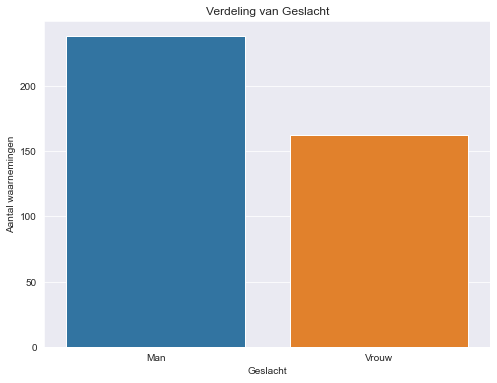

In [8]:
# Maken dictionary voor x_ticks
ticks_geslacht = {0:'Man', 1:'Vrouw'}

# Gebruik van math.verdeling_d
math.verdeling_d('Geslacht', ticks_geslacht)

Het geslacht heeft in deze dataset 2 verschillende waardes, mannelijk en vrouwelijk. Deze waarde kennen geen numerieke schaal of volgorde. Het ene geslacht is namelijk niet beter dan het andere.

Het kengetal dat het beste past bij elke nominale waarde is de modus, dit is omdat er voor de andere kengetallen gebruik gemaakt moet worden van volgorde of duidelijke numerieke waarden. Voor nominale waarden is het daarom dus makkelijker om te kijken naar de frequentie en de modus.

In [9]:
# Tonen van de frequentie
print(df['Geslacht'].value_counts())

0    238
1    162
Name: Geslacht, dtype: int64


Bij het bekijken van de frequentie is er te zien dat de waarde 0 (= man) vaker gezien is dan de waarde 1 (= vrouw). Aangezien het totaal aantal rijen van deze dataset 400 is, geeft de frequentie weer dat ongeveer 60% van de mensen een man is. Dit geeft ook meteen het meest voorkomende geslacht in de dataset aan.

[Terug naar het begin](#begin)

--------------------

### Hoogste opleiding <a name='hopl'></a>
De hoogst behaalde opleiding bevindt zich op het ordinale meetniveau, daarom zal de mediaan gebruikt worden. Het verschil tussen een variabel als geslacht en deze is dat de hoogste opleiding wel een volgorde kent. Door deze volgorde is het een ordinaal meetniveau, aangezien de betreffende waardes zelf geen getallen zijn. Ook hierbij zijn de waardes weer omgezet naar getallen, deze betreffen: {1 : Middelbare School, 2 : MBO, 3 : HBO, 4 : Universiteit}. Deze waardes gaan in niveau omhoog, op dezelfde waarde als de getallen die er aan zijn toegewezen, 1 is het laagste niveau en 4 is het hoogste niveau.

De mediaan van deze 5 regels is 3, het HBO. Dit is bepaald door de kennis dat de mediaan het middelste getal is in een reeks. De reeks voor deze eerste 5 regels is {1, 2, 3, 3, 4}. Omdat het een oneven aantal is kan er voor het middelste getal worden gekozen. Bij de mediaan hoort ook de IQR, deze waarde wordt als volgt berekent:
``` 
Eerst bepalen we Q1 en Q3. Q1 heeft een waarde van 1.5, de mediaan van {1, 2}. Q3 heeft een waarde van 3.5, de mediaan van {3, 4}. Om de IQR te bepalen halen we Q1 van Q3 af. Dit geeft ons Q3 - Q1 = IQR, dit leidt tot 3.5 - 1.5 = 2.
```

Ook voor de hoogste opleiding zal gebruik worden gemaakt van een staafdiagram. Deze variabele heeft ook meerdere categorieën en in een staafdiagram kan duidelijk de frequentie van een staafdiagram worden getoond. Deze waardes zullen ook van 1 naar 4 genummerd staan in de grafiek. Deze grafiek wordt gemaakt door gebruik te maken van de classe WisHelper en haar methode verdeling_d.

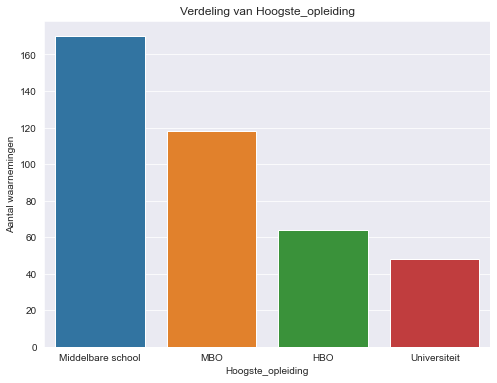

In [10]:
# Maken dictionary voor x_ticks
ticks_opleiding = {0:'Middelbare school', 1:'MBO', 2:'HBO', 3:'Universiteit'}

# Gebruik van math.verdeling_d
math.verdeling_d('Hoogste_opleiding', ticks_opleiding)

Bij een ordinaal meetniveau word altijd gekeken naar de mediaan. Hoewel de modus ook een mogelijkheid zou zijn, is deze waarde vaak niet geschikt als kengetal bij ordinale variabelen. De modus kan namelijk zal namelijk het meest voorkomende niveau geven, in plaats van dat de mediaan het middelste niveau weergeeft.

In [11]:
print(math.dfstat.Median.Hoogste_opleiding)

2.0


De mediaan geeft als waarde 2 terug, dit geeft aan dat het middelste niveau van de personen in de dataset het MBO is. Als de mediaan wordt bepaalt geeft dat ook opening om te kijken naar de spreiding, om een duidelijker beeld te schetsten. Hiervoor wordt De IQR, Inter Quartile Range, gebruikt. Dit kan op de volgende manier:

In [12]:
print(math.dfstat.IQR.Hoogste_opleiding)

2.0


Zoals te zien is aan de getoonde berekening, is de q1 waarde 1 (= Middelbare School) en de q3 waarde is 3 (= HBO). Dit geeft aan dat op de afstand tussen de zones van 25% en 75% van de data 2 niveaus groot is.

[Terug naar het begin](#begin)

--------------------

### Leeftijd <a name='age'></a>

Leeftijd bevindt zich op het meetniveau ratio. Ten opzichte van een interval, nemen wij de waarde leeftijd aan met de geboorte als absoluut nulpunt. Daardoor is er een keuze tussen het gemiddelde en de mediaan. Wegens de hoeveelheid data en kennis beschikbaar is er gekozen voor de mediaan. Leeftijd kan namelijk erg breedt zijn, ook in de eerste 5 regels is dit te zien. De hoogste waarde is 61 en de laagste waarde is 39. De mediaan van de leeftijd is 46, het middelste getal van de getallenreeks {39, 46, 46, 48, 61}. Ook hier moet de IQR weer worden berekent:
```
Q1 is 43, het midden van {39, 46} en Q3 is 54, het midden van {48, 61}. De IQR is dan weer Q3 - Q1 = IQR, dus 54 - 43 = 11
```

Voor de variabele Leeftijd in de gehele dataset, kunnen we een geschikte grafiek maken om de verdeling van leeftijden te visualiseren. Aangezien Leeftijd een numerieke variabele is, kunnen we een histogram gebruiken om de frequentie of het aantal waarnemingen in verschillende leeftijdsgroepen weer te geven. Deze grafiek wordt gemaakt door gebruik te maken van de classe WisHelper en haar methode verdeling_c.

Skewness type: Normaal-verdeeld
Skewness waarde: 0.23538475436743705


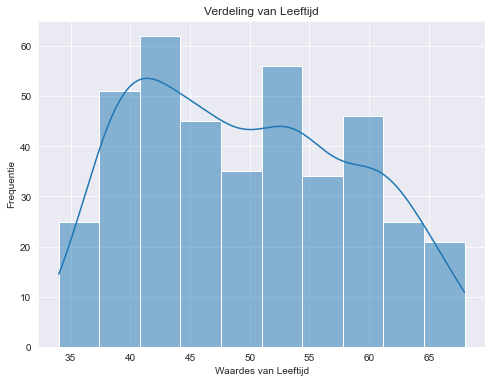

In [13]:
# Toepassen math.verdeling_c
math.verdeling_c('Leeftijd')

Voor numerieke waardes van interval of ratio niveau is een keuze tussen de mediaan of het gemiddelde als kengetal belangrijk. Voor de leeftijd is gekozen om de mediaan te nemen. Deze waarde is gekozen omdat de verdeling meerdere pieken heeft rond bepaalde leeftijdsgroeperingen, hierdoor is het lastig te zeggen of de data goed normaal verdeeld is.

In [14]:
print(math.dfstat.Median.Leeftijd)

49.0


Het bepalen van de mediaan geeft de leeftijd 49 weer. Dit betekent dat de middelste waarde tussen alle leeftijden 49 is. Het gemiddelde kan hiervan afwijken, omdat deze sneller wordt beïnvloedt door outliers. Bij de mediaan hoort ook nog de IQR, deze zal meer inzage geven over de spreiding van de leeftijd.

In [15]:
print(math.dfstat.IQR.Leeftijd)

14.0


Deze berekening geeft aan dat er 14 jaar zit tussen de 25% en de 75% lijn van de totale data. Aangezien de data van de Leeftijd variabele strekt van 34 tot 66, is er te zien dat de data buiten deze percentielen meer gespreid is dan de data binnen de percentielen.

[Terug naar het begin](#begin)

--------------------

### BMI <a name='bmi'></a>

De BMI waarde bevindt zich op interval niveau. Dit is omdat deze numerieke waarde geen duidelijk absoluut nulpunt heeft. Dit is omdat een BMI van 0 niet speceficeerd welk van de 2 waardes dan nul zou zijn, de lengte van een individu of het gewicht van een individu. Daarnaast is het onmogelijk om als persoon geen lengte of gewicht te hebben op aarde, waardoor een BMI van nul niet al nulpunt kan worden beschouwd. Omdat de BMI een wat stabielere waarde is dan leeftijd, hiermee wordt bedoeld dat de waarde meer consistent tussen bepaalde waardes in ligt, wordt er gekozen voor het gemiddelde. Het gemiddelde is de som van alle waarden gedeeld door het aantal waarnemingen. De waarde is:

$ \frac{(26.97 + 28.73 +25.34 + 28.58 + 23.10)}{5} = \frac{132.72}{5} = 26.54 $ 

Bij het gemiddelde komt ook de standaard deviatie kijken, een waarde die meer inzage geeft over de spreiding van de data. Deze waarde wordt berekent door de wortel te nemen van de varaintie. In de onderstaande formule worden deze gecombineerd, waarbij de berekening binnen de wortel van de variantie is. Omdat de gebruikte data maar een deel van de totale data is zal bij het aantal waarnemingen (n) er de waarde 1 vanaf getrokken worden, om te corrigeren voor de potetiële bias. 

$\sqrt{\frac{\sum(x - gem)^2}{n - 1}} $


De waarde van n - 1 is: <br> $ n - 1 = 5 - 1 = 4 $ <br>
De waarde van SOM(x-gem) is: <br> $ (26.97 - 26.54)^2 + (28.73 - 26.54)^2 + (25.34 - 26.54)^2 + (28.58 - 26.54)^2 + (23.10 - 26.54)^2 = 22.41619999999 $<br>
De variantie is: <br> $ \frac{22.41619999999}{4} = 5.6040499999999955 $ <br>
De standaard deviatie is: <br> $ \sqrt5.6040499999999955 = 2.3672874772616854 $


De grafiek die het beste past bij het tonen van de verdeling van de BMI is een histogram. Histogrammen laten duidelijk de spreiding zien van de waardes in de kolom. Deze waardes zullen dichter bij elkaar liggen wegens de waardes die BMI kan aannemen. De verwachting is dat de BMI waarden een rechtsscheve verdeling gaan tonen, omdat de meeste mensen een gezond tot licht overgewicht als BMI zullen hebben. Dit zijn de waardes 20 tot en met 30. Deze grafiek wordt gemaakt door gebruik te maken van de classe WisHelper en haar methode verdeling_c.

Skewness type: Rechts-scheef
Skewness waarde: 1.1361944600841678


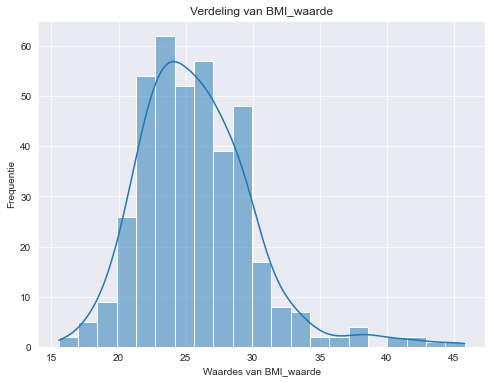

In [16]:
# Toepassen math.verdeling_c
math.verdeling_c('BMI_waarde')

Voor numerieke waardes van interval of ratio niveau is een keuze tussen de mediaan of het gemiddelde als kengetal belangrijk. Na het bekijken van de verdeling is er voor de BMI is gekozen om de mediaan te nemen. Deze waarde is gekozen omdat er outliers aanwezig zijn. De bedoeling is om de outliers zo min mogelijk mee te laten wegen, de mediaan zal hierbij helpen. Ook is de data niet normaal verdeeld, waardoor het gemiddelde niet accuraat zal zijn.

In [17]:
print(math.dfstat.Median.BMI_waarde)

25.36


Het bepalen van de mediaan geeft een BMI van 25.36 weer. Dit betekent dat de middelste waarde tussen alle BMI waardes 25.36 is. Het gemiddelde kan hiervan afwijken, omdat deze sneller wordt beïnvloedt door outliers. Bij de mediaan hoort ook nog de IQR, deze zal meer inzage geven over de spreiding van de leeftijd.

In [18]:
print(math.dfstat.IQR.BMI_waarde)

5.327500000000001


Deze berekening geeft aan dat er tussen de 25% en de 75% lijn van de data maar een verschil is van 5.33. Dit is ten opzichte van de totale range (die van ca. 16 tot ca. 45 gaat) erg weinig. Dit betekent dat de meeste data erg dicht bij elkaar licht, zoals ook op de histogram te zien is. De spreiding van de data is rondom de mediaan is dus nauwelijks aanwezig.

[Terug naar het begin](#begin)

--------------------

### Werkeloos <a name='werkeloos'></a>
De kolom werkeloos bevindt zich op het nominale meetniveau, voor deze reden zal de modus gebruikt worden als kengetal. Om op een duidelijke manier met deze waarde om te kunnen gaan in python, zijn de waardes omgezet naar het volgende: {0 : werkeloos, 1 : niet werkeloos}.

De modus van de eerste 5 regels is 0, er zijn namelijk 5 nullen te vinden. Dit geeft aan, op basis van de eerste 5 regels, dat de meest voorkomende waarde werkeloos is.

Omdat bij de kolom 'Werkeloos' sprake is van een nominale waarde met 2 mogelijke opties, is er gekozen voor een staafdiagram. Op deze manier is het makkelijk te zien hoe de verdeling in elkaar zit. Ook is het verschil tussen de waarde 'werkeloos' en 'niet werkeloos' op deze manier het makkelijkst te tonen. Deze grafiek wordt gemaakt door gebruik te maken van de classe WisHelper en haar methode verdeling_d.

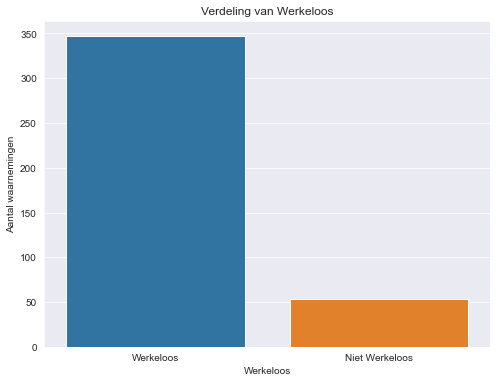

In [19]:
ticks_werk = {0:'Werkeloos', 1:'Niet Werkeloos'}

math.verdeling_d('Werkeloos', ticks_werk)

Het kengetal dat het beste past bij elke nominale waarde is de modus, dit is omdat er voor de andere kengetallen gebruik gemaakt moet worden van volgorde of duidelijke numerieke waarden. Voor nominale waarden is het daarom dus makkelijker om te kijken naar de frequentie en de modus.

In [20]:
print(df['Werkeloos'].value_counts())

0    347
1     53
Name: Werkeloos, dtype: int64


Door naar de frequentie te kijken van de waardes is duidelijk te zien dat de meeste mensen 0 (= werkeloos) hebben ingevuld. Dit geeft aan dat de modus, met een redelijk hoog percentage van ongeveer 87%, op werkeloos ligt in deze dataset.

[Terug naar het begin](#begin)

------------

## Tabel van kengetallen en grafieken <a name='tabel'></a>
Hier is een tabel gemaakt met de kengetallen en grafieken die zinvol zijn om te gebruiken bij het analyseren van de data.

<table align='left'>
  <tr>
    <th>Meetniveau's</th>
    <th>Centrummaten</th>
    <th>Spreidingsmaten</th>
    <th>Welke maat wanneer?</th>
    <th>Grafieken</th>
    <th>Welke grafiek wanneer?</th>
  </tr>
  <tr>
    <td>Nominaal</td>
    <td>- Modus</td>
    <td>- Geen</td>
    <td>- N.V.T.</td>
    <td>- Staafdiagram<br>- Cirkeldiagram</td>
    <td>- Voor de frequentie van de variabelen<br>- Voor de proporties van de variabelen</td>
  </tr>
  <tr>
    <td>Ordinaal</td>
    <td>- Modus<br>- Mediaan</td>
    <td>- Geen<br>- Inter Quartile Range</td>
    <td>- Vinden van de meest populaire optie<br>- Vinden van de middelste waarde</td>
    <td>- Staafdiagram</td>
    <td>- N.V.T.</td>
  </tr>
  <tr>
    <td>Interval</td>
    <td>- Mediaan<br>- Gemiddelde</td>
    <td>- Inter Quartile Range<br>- Variantie/Standaard deviatie</td>
    <td>- Outliers of niet-normaal verdeeld<br>- Normaal verdeeld en weinig outliers</td>
      <td>- Histogram<br>- Lijngrafiek<br>- Boxplot</td>
    <td>- Voor de verdeling van de variabelen<br>- Voor het tonen van de variabelen t.o.v. continue variabel<br>- Bekijken van mediaan, verdeling en outliers</td>
  </tr>
  <tr>
    <td>Ratio</td>
    <td>- Mediaan<br>- Gemiddelde</td>
    <td>- Inter Quartile Range<br>- Variantie/Standaard deviatie</td>
    <td>- Outliers of niet-normaal verdeeld<br>- Normaal verdeeld en weinig outliers</td>
    <td>- Zelfde als Interval<br>- Scatterplot<br>- Staafdiagram</td>
    <td>- Zie interval niveau<br>- Voor het tonen van de waarden t.o.v. een andere numerieke waarde<br>- Voor het tonen van de verdeling op basis van categorie</td>
  </tr>
</table>



[Terug naar het begin](#begin)

------------

## Analyse van een binaire kolom <a name='rokers'></a>
De waardes van een binaire kolom zijn altijd 0 en 1. Deze waarden zijn ook terug te vinden in de Roker kolom, deze kolom heeft dus de volgende waardes: <br>{0 : ja, 1 : nee}. Om het aantal rokers te vinden kunnen de rijen geteld worden waarbij de waarde gelijk staat aan 0. Voor het aantal mensen dat deel nam aan de enquete kan de lengte van de dataset worden gebruikt. Deze waarden samen worden gebruikt om het percentage rokers uit te rekenen, dit gebeurt door middel van de volgende methode: 

${\frac{Deel}{Geheel}} * 100 $

In [21]:
# Tonen van aantal rokers en het totaal aantal personen
aantal_rokers = len(df[df['Roker'] == 0])
totaal_personen = len(df)
print(f'Het aantal rokers in de dataset is: {aantal_rokers}')
print(f'Het totaal aantal personen is: {totaal_personen}')

# Berekenen en tonen van percentage mensen dat rookt
percentage_rokers = aantal_rokers / totaal_personen * 100
print(f'Het percentage mensen dat rookt is: {percentage_rokers}%')

Het aantal rokers in de dataset is: 209
Het totaal aantal personen is: 400
Het percentage mensen dat rookt is: 52.25%


Vervolgens word de kans berekend dat 3 willekeurige personen het antwoord 'ja' hebben ingevuld. Het percentage mensen dat rookt volgens de data is 52.25%. Door deze waarde tot de macht van 3 te nemen wordt de kans berekent dat deze gebeurtenis 3 maal voor zal komen. Deze berekening verloop als volgt:

$ 0.5225^3 = 0.142645766 $

Deze berekening geeft aan dat de kans dat 3 willekeurige mensen allemaal ja hebben ingevuld gelijk is aan:

$ 0.142645766 * 100 = 14.26\% $

Nadat deze berekening is gedaan wordt de kans berekent dat slechts 1 van deze 3 personen ja heeft ingevuld. De mogelijke scenario's voor deze kans zijn:<br>u = {nee, nee, ja}, u = {nee, ja, nee} en u = {ja, nee, nee}. De kans dat 1 persoon een roker is volgens de dataset is 52.25%, dit betekent dat er een 47.75% kans is om een niet roker te zijn. 

Daarna worden de kans op deze gebeurtenis vermenigvuldigd met 3, om zo de kans te berekenen dat dit exacte scenario voorkomt. Om dit te berekenen word de formule voor binominale kans toegepast:<br>
$ P(X = k) = C(n, k) * p^k * (1 - p)^{n - k}$<br>

Dit geeft de volgende kans: <br>
$ P(X = 1) = C(3, 1) * 0.5225^1 * (1 - 0.5225)^{3 - 1} = 3 * 0.5225 * 0.4775^2 = 0.357399796875 $<br>

De berekening laat zien dat de kans dat deze gebeurtenis voor zal komen gelijk is aan 35.74%.

[Terug naar het begin](#begin)

--------------------

## Discrete en Continue verdelingen <a name='cholesterol'></a>

In de wereld van kansrekenen spreken we van 2 verschillende soorten verdelingen, discrete en continue verdelingen. Het verschil tussen de twee verdelingen ligt in het type waardes dat ze aan kunnen nemen. Continue verdelingen beschijven de mogelijkheden en kunnen waardes aannemen van eindeloze variatie, dit is een groep variabelen die een oneindige en ontelbare variatie heeft. Bij continue verdelingen wordt vaak gekeken of de waarde binnen een bepaald interval valt. Voorbeelden van continue verdelingen zijn de normaal verdeling en de exponetiële verdeling.

Discrete verdelingen beschrijven de waarschijnlijkheid van het voorkomen van bepaalde variabelen. Deze verdeling heeft telbare variabelen, zoals een inventarisatie van niet-negatieve gehele getallen. Bij discrete verdelingen wordt er vaak gekeken wat de kans is op die gebeurtenis. Voorbeelden van discrete verdelingen zijn de binominale verdeling en de poisson verdeling.

Voor alle soorten verdelingen moeten de volgende twee eigenschappen kloppen:

- De kans van elke uitkomst heeft een waarde van 0 t/m 1, deze waarde kan dus nooit negatief zijn.
- De totale som van de kans is gelijk aan 1.

Cholesterol is een aparte waarde, dit komt door het type verdeling dat deze waarde vaak aanneemt. Technisch gezien is cholesterol een discrete variabele, maar toch word de cholesterol waarde vaak als continue variabel gebruikt. Dit heeft de volgende redenen:

- **Geen verlies van data**: Als cholesterol als discrete variabel aangenomen zou worden, zullen de subtielere verschillen wegvallen.
- **Medisch onderzoek**: Bij medisch onderzoek is het belangrijk dat onderzoekers meer gedetailleerde kunnen uitvoeren met cholesterol, om bijvoorbeeld te kijken of het invloed heeft op andere gezondheidsfactoren.
- **Nauwkeurigheid**: Doordat cholesterol als continue wordt gezien zijn de modellen die ermee worden gemaakt veel nauwkeuriger dan wanneer cholesterol een discrete verdeling zou hebben.

[Terug naar het begin](#begin)

------------

## Correlatie tussen kolommen <a name='corr_1'></a>

Nu wordt er gekeken naar de correlatie tussen 3 paren van kolommen. De gekozen paren zijn:
1. Roker en Sigaretten_per_dag
2. Leeftijd en Hoge_bloeddruk
3. Cholesterolwaarde en Hoge_bloeddruk

De correlatie wordt berekent door gebuik te maken van de methode van spearman. Deze wordt gebruikt omdat de methode van spearman scheve verdelingen kan gebruiken.

Het eerste paar dat wordt getest is Roker en Sigaretten_per_dag. Deze is gekozen omdat er vanuit wordt gegaan dat mensen die roken een hoger aantal sigaretten per dag zullen hebben dan de niet rokende mensen. Er wordt hierbij een erg sterke positieve relatie verwacht.

In [22]:
math.corr('spearman', 'Roker', 'Sigaretten_per_dag')

Spearman correlatie tussen Roker en Sigaretten_per_dag: 0.9374066757418915
P-waarde: 1.9754268270393866e-184


De Spearman correlatie is 0.937, wat een zeer sterke positieve correlatie aangeeft. Dit suggereert dat rokers over het algemeen meer sigaretten per dag roken. De p-waarde is praktisch 0, wat aangeeft dat de correlatie zeer significant is.

Dan wordt de correlatie tussen Leeftijd en Hoge_bloeddruk bekeken. De verwachting is dat mensen met een hogere bloeddruk over het algemeen ook ouder zullen zijn. Er wordt hier een positieve correlatie verwacht.

In [23]:
math.corr('spearman', 'Leeftijd', 'Hoge_bloeddruk')

Spearman correlatie tussen Leeftijd en Hoge_bloeddruk: 0.2615141489447142
P-waarde: 1.1172475753938544e-07


De Spearman correlatie is 0.262, wat een zwakke positieve correlatie aangeeft. Dit suggereert dat oudere mensen iets meer kans hebben op hoge bloeddruk. De p-waarde is praktisch 0, wat aangeeft dat de correlatie zeer significant is.

Als laatste wordt de correlatie tussen de kolommen Cholesterolwaarde en Hoge_bloeddruk bekeken. Er wordt verwacht dat ook een hogere cholesterolwaarde meespeelt bij een hogere bloeddruk. Ook hier wordt dus een positieve correlatie verwacht.

In [24]:
math.corr('spearman', 'Cholesterolwaarde', 'Hoge_bloeddruk')

Spearman correlatie tussen Cholesterolwaarde en Hoge_bloeddruk: 0.1379432365190539
P-waarde: 0.0057193273498347625


De Spearman correlatie is 0.138, wat een zeer zwakke positieve correlatie aangeeft. Dit betekent dat mensen met een hogere cholesterolwaarde iets vaker hoge bloeddruk hebben, maar het verband is erg zwak. De p-waarde is kleiner dan 0.05, wat aangeeft dat de correlatie significant is.

De verwachtingen waren enigszins juist. De sterkste correlatie is tussen roken en het aantal sigaretten per dag. De correlaties van leeftijd en cholesterolwaarde met hoge bloeddruk zijn zwakker maar nog steeds significant. Hoewel deze correlaties zwak zijn, tonen ze nog steeds aan dat er enige relatie is tussen deze variabelen.

[Terug naar het begin](#begin)

--------------------

# Deel B <a name = 'deelb'> </a>

## Basiswaarden samengestelde variabele <a name='bas'></a>

Het combineren van verschillende variabelen tot een samengestelde variabele, zoals in dit geval "Mental_Health", vereist dat aan enkele basisvoorwaarden wordt voldaan:

**Consistentie van meetniveaus**: Alle variabelen die worden gebruikt, moeten op een vergelijkbaar niveau worden gemeten. Als de variabelen in rangorde worden gemeten (zoals: slecht, midden, goed), dan moeten alle variabelen op deze schaal worden gemeten om ze bij elkaar op te kunnen tellen voor een nieuwe variabele.

**Gelijkwaardig belang**: Wanneer je de 'scores', van de variabelen waaruit "Mental_Health" wordt gemaakt, optelt, wordt er vanuit gegaan dat elke variabele even zwaar weegt voor de uiteindelijke variabele. Als één variabele zwaarder weegt dan de andere, dan moet er een gewichtsfactor toegepast worden wanneer de scores bij elkaar worden opgeteld. Als geen van de variabele zwaarder weegt dan de andere, en ze allemaal even zwaar wegen, dan dragen de aspecten evenredig bij aan "Mental_Health".

**Controle**: Er moet nagegaan worden of mensen die goed of slecht presteren op verschillende aspecten, ook goed of slecht scoren op "Mental_Health". Dit kan gebeuren door te kijken naar de verbanden tussen elke afzonderlijke variabele en "Mental_Health". Ook kan er gekeken worden naar de eventuele verschillen tussen de "Mental_Health" kolom en de al bestaande "Mentale_gezondheid" kolom.

**Betrouwbaarheid**: Alle metingen bij elke variabele moeten betrouwbaar zijn. Dus als we dezelfde variabelen op een ander tijdstip meten, moeten er dezelfde antwoorden uitkomen.

Het is goed om te weten dat dit soort samengevoegde variabelen, hoewel ze handig zijn, ook beperkingen hebben. Deze variabelen kunnen helpen om algemene patronen te zien, maar ze kunnen ook de unieke ervaringen van mensen verbergen. Daarom moet er zowel naar de samengevoegde variabele "Mental_Health" als naar de losse variabelen kijken als de resultaten van het onderzoek begrepen willen worden.

--------------------

## Het maken van Mental_Health <a name='mental'></a>

Eerst is er gekeken naar alle kolommen die gebruikt worden om op te tellen:

In [25]:
kolommen = ['Sociaal_functioneren', 'Empatisch_reageren',
            'Positieve_levenshouding', 'Mentale_vaardigheden',
            'Leven_in_balans', 'Persoonlijke_grenzen']

for kol in kolommen:
    print(f'Spreiding {kol}:')
    display(df[kol].value_counts())

Spreiding Sociaal_functioneren:


4    104
3    102
2     97
1     61
5     36
Name: Sociaal_functioneren, dtype: int64

Spreiding Empatisch_reageren:


3    115
2    107
1     84
4     74
5     20
Name: Empatisch_reageren, dtype: int64

Spreiding Positieve_levenshouding:


4    109
2     91
3     88
5     58
1     54
Name: Positieve_levenshouding, dtype: int64

Spreiding Mentale_vaardigheden:


2    98
3    98
4    89
1    82
5    33
Name: Mentale_vaardigheden, dtype: int64

Spreiding Leven_in_balans:


4    103
3     87
2     86
5     67
1     57
Name: Leven_in_balans, dtype: int64

Spreiding Persoonlijke_grenzen:


2    101
3     94
4     92
1     77
5     36
Name: Persoonlijke_grenzen, dtype: int64

Aangezien hier geen fouten in lijken te zitten kan de kolom Mental_Health worden aangemaakt.

In [26]:
df['Mental_Health'] = df[kolommen].sum(axis=1)
display(df['Mental_Health'])

0      14
1      24
2      25
3      22
4      16
       ..
395    23
396    16
397    15
398    20
399    20
Name: Mental_Health, Length: 400, dtype: int64

De gemaakte variabele "Mental_Health" is ordinair van aard. Dat betekent dat de waarden in een bepaalde volgorde voorkomen, maar er is geen vaste, gelijke afstand en betekenis tussen de waardes die deze variabele aan kan nemen.

Dit komt omdat "Mental_Health" de optelsom is van zes andere variabelen die ook ordinair zijn. Deze variabelen zijn "sociaal_functioneren", "empatisch_reageren", "positieve_levenshouding", "mentale_vaardigheden", "leven_in_balans" en "persoonlijke_grenzen". Ze worden allemaal gemeten op een schaal van 1 tot 5, waarbij 1 betekent "niet" en 5 betekent "volledig".

Hoewel "Mental_Health" soms behandeld kan worden alsof het een interval is (wat betekent dat de stappen tussen de waarde een vaste, gelijke afstand en betekenis hebben), is dat niet correct en kan het soms tot misleidende resultaten leiden. Het is dus belangrijk om te onthouden dat "Mental_Health" ordinair is wanneer deze variabele gebruikt wordt in analyses.

[Terug naar het begin](#begin)

--------------------

## Opgave 16

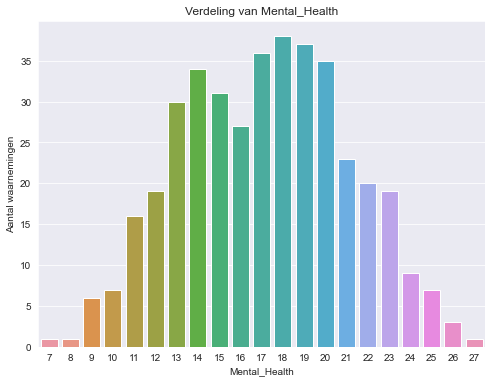

In [42]:
# Opnieuw initialiseren van WisHelper
math = WisHelper(df)

# Gebruik van math.verdeling_d
math.verdeling_d('Mental_Health')

In [45]:
math.dfstat.Median.Mental_Health

17.0

In [46]:
math.dfstat.IQR.Mental_Health

6.0

[Terug naar het begin](#begin)

--------------------

## Opgave 17

Door de verdeling van de Mental_Health kolom om te zetten in bins, waardoor ook deze waarde rijkt van categorieën die de waardes 1 to en met 5 hebben.

[Terug naar het begin](#begin)

--------------------

# Deel C <a name='deelc'></a>

## Het lineaire verband <a name='lineair'></a>

Een lineair verband is de relatie tussen twee variabelen waarbij de verandering in een van de variabelen samenhangt met de andere variabele op een rechte lijn. Dit houd in dat als een van de variabelen toeneemt, de ander dit op een constante en voorspelbare wijze ook doet.

In wiskundige termen kan dit worden uitgedrukt in de standaard lineaire vergelijking: $ y = ax + b $. Deze formule bestaat uit vier waardes: x, y, a en b.
- x is de onafhankelijke variabele
- y is de afhankelijke variabele
- a is de richtingscoëfficient
- b de kruising van de lijn met de y-as.

Bij deze formule zijn a en b constante waardes, deze kunnen in een verband niet van waarde veranderen. Doordat de waardes van a en b constant zijn, kan er in één oog opslag gezien worden hoe de lijn in het verband zich vormt. De a-waarde laat zien hoeveel de y-waarde beweegt voor elke stap die x zet. Terwijl de b-waarde toont wat de y-waarde zal zijn als x niet aanwezig is. Samen zorgen de vier variabelen voor een stabiele en simpel voorspelbare lijn. In het kort is een lineair verband dus de constante en voorspelbare correlatie tussen twee variabelen in de vorm van een rechte lijn.

[Terug naar het begin](#begin)

--------------------

## Opgave 19

## Opgave 20

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array(df[['Glucosegehalte', 'Bloeddruk_diastolisch', 'Voldoende_dagelijkse_beweging']])
y = np.array(df['BMI_waarde'])

#Antwoord:
# Toepassen van train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.20, random_state = 42)

# aanmaken model en trainen
model = LinearRegression()
model.fit(X_train, y_train)

# voorspellen van de waardes
y_predicted = model.predict(X_test)
r2= r2_score(y_test, y_predicted)
print('r2: '+str(r2))

r2: 0.16248827901890306


[Terug naar het begin](#begin)

--------------------

## Opgave 21

[Terug naar het begin](#begin)

--------------------

## Opgave 22

[Terug naar het begin](#begin)

--------------------

## Onderzoek van Cholesterolwaarde <a name='cho'></a>

Volgens bronnen zou de variabele 'Cholesterolwaarde' normaal verdeeld moeten zijn. Daarbij zou het gemiddelde een waarde van 230 moeten hebben en de standaard deviatie zou een waarde van 40 moeten bedragen. Om na te gaan of dit klopt kan de volgende code worden gebruikt:

Skewness type: Rechts-scheef
Skewness waarde: 0.5384059680492227


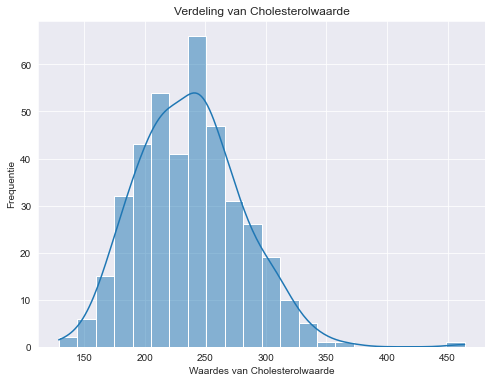

In [28]:
math.verdeling_c('Cholesterolwaarde')

Zoals te zien is, is de waarde net aan rechts-scheef bij de verdeling. Dit is op basis van een vaak genomen grenswaarde van 0.5. Als de skewness van de grafiek deze grenswaarde overschrijdt op het positieve spectrum is de grafiek rechtsscheef. Als de skewness van de grafiek een waarde heeft van -0.5 of lager zou de grafiek worden gezien als linksscheef. Omdat de skewness van de grafiek 0.538 is, ligt het net over de grenswaarde en daardoor wordt de grafiek gezien als rechts-scheef.

De volgende stap is om te kijken of ook het gemiddelde en de standaarddeviatie kloppen.

In [29]:
print(f'Het gemiddelde van Cholesterolwaarde is: {math.dfstat.Mean.Cholesterolwaarde}')
print(f'De standaard deviatie van Cholesterolwaarde is: {math.dfstat.Std.Cholesterolwaarde}')

Het gemiddelde van Cholesterolwaarde is: 237.4825
De standaard deviatie van Cholesterolwaarde is: 43.29666496096268


[Terug naar het begin](#begin)

--------------------

### Kans op hoge cholesterol <a name='kans'></a>

Nu zal er berekent worden wat de kans is bij P(X > 250). Tijdens deze berekening wordt er uitgegaan van de gevens van het oude onderzoek, dit is omdat de verkregen data net aan rechts-scheef is verdeeld. De volgende data is dan van toepassing:

$X:$ De cholesterolwaarde, in dit geval 250<br>
$\overline{x}:$ Het gemiddelde, 230<br>
$\sigma:$ De standaard deviatie, 40

Om eerste stap is het berekenen van de z-score. De wordt berekent op de volgende manier:

$ Zscore = \frac{(X - \overline{x})}{\sigma} = \frac{(250 - 230)}{40} = \frac{20}{40} = 0.5 $

Om te de cumulatieve kans te bereken moet de Z-score eerst in de [Z-score Tabel](https://www.z-table.com/) worden opgezocht. Omdat er van een normale verdeling wordt uitgegaan is het mogelijk om deze te bepalen. Als er in de tabel wordt gekeken is te zien dat een z-score van $0.5$ gelijk staat aan een kans van $0.6915$ of $69.15\%$. Om de kans op P(X > 250) te berekenen moet deze kans van 1 worden afgehaald, daar komt de volgende kans uit:

$P(X>250) = 1 - 0.6915 = 0.3085$

Dit is gelijk aan een percentage van $30.85\%$, dit is dan ook de kans dat de cholesterolwaarde hoger is dan 250.

Om te bepalen wat de empirische kans is op P(X > 250) op basis van de dataset moet er eerst worden gekeken naar de data. Om deze berekening uit te voeren zijn er twee waardes nodig: Het totaal aantal waarnemingen en het aantal waardes dat voldoet aan P(X > 250). Deze waardes worden door elkaar gedeeld om zo de empirische kans te benaderen.

In [30]:
# bepalen van aantal waarneminge met X > 250 en totale waarnemingen
x250 = len(df[df['Cholesterolwaarde'] > 250])
waarnemingen = len(df)

# Berekenen van empirische kans
emp_kans = x250 / waarnemingen * 100
print(f"De benaderde kans P(X > 250) is: {x250} / {waarnemingen} = {emp_kans}%")

De benaderde kans P(X > 250) is: 141 / 400 = 35.25%


Zoals te zien is in de berekening is er een kans van $35.25\%$ dat iemand zijn cholesterol hoger is dan 250. Echter is het belangrijk om te onthouden dat gebruikte data afwijkt van de daadwerkelijke waardes, dit is te zien aan de rechts-scheve verdeling. De benadering kan dus minder nauwkeurig zijn.

[Terug naar het begin](#begin)

--------------------

### Eerste test <a name='test1'></a>

Echter laten recentere onderzoeken zien dat het gemiddelde ($\mu$) inmiddels 235 is en de standaard deviatie ($\sigma$) gelijk is geworden aan 43. Door deze reden wordt er met python gekeken of, op basis van de verkregen steekproef, deze uitkomsten vastgehouden moeten worden. Dit word gedaan met behulp van een statistische toets, de 1-sample t-toets. De t-toets is minder gevoelig tegen afwijkingen in de data dan de z-toets, waardoor de t-toets zich opsteld als de betere keuze. Hierbij gelden de volgende hypothesen:

$H_0:$ Het gemiddelde wijkt niet genoeg af van 230<br>
$H_1:$ Het gemiddelde wijkt genoeg af van 230

In [31]:
math.one_sample_t('Cholesterolwaarde', 230)

De nulhypothese wordt verworpen omdat de P-waarde 0.000606297053132787 kleiner is dan alpha 0.05


Zoals te zien is in de uitkomst van de bovenstaande cel wordt de nulhypothese verworpen, dit betekent dat er statistisch bewijs is gevonden dat het gemiddelde van de steekproef afwijkt van 230.

[Terug naar het begin](#begin)

--------------------

### Betrouwbaarheidsintervallen <a name='betr'></a>

Ook wordt er gekeken naar de betrouwbaarheidsintervallen, de waarde die aantoont voor welke waardes de nulhypothese wordt behouden. Dit interval wordt vaak uitgedrukt met een percentage, bijvoorbeeld 95%. Dit percentage geeft aan dat er 95% van steekproeven het daadwerkelijke populatie gemiddelde zullen bevatten. Dit is een belangrijke statistische berekening om de schatting van een populatie gemiddelde te beoordelen en het bereik te bepalen waar het populatie gemiddelde zich, naar waarschijnlijkheid, in bevindt.

Er zal daarom nu gekeken worden naar de betrouwbaarheidsintervallen van 95% en 90%, voor de waardes van Cholesterolwaarde.

In [32]:
# Bepalen X, s en n van de steekproef
X = math.dfstat.Mean.Cholesterolwaarde
s = math.dfstat.Std.Cholesterolwaarde
n = len(df['Cholesterolwaarde'])

# Alpha bij betrouwbaarheidsinterval (95%)
a_95 = 0.05

# Bereken het betrouwbaarheidsinterval (95%)
math.b_interval(a_95, X, s, n)

Betrouwbaarheidsinterval bij alpha 0.05: [233.22659522654527, 241.7384047734547]


In [33]:
# Alpha bij betrouwbaarheidsinterval (90%)
a_90 = 0.1

# Bereken het betrouwbaarheidsinterval (90%)
math.b_interval(a_90, X, s, n)

Betrouwbaarheidsinterval bij alpha 0.1: [233.91337940071625, 241.05162059928372]


Met deze twee betrouwbaarheidsintervallen kan worden geschat dat het daadwerkelijke populatie gemiddelde zich waarschijnlijk tussen de 234 en 241 zal bevinden.

[Terug naar het begin](#begin)

--------------------

### Tweede test <a name='test2'></a>

Vervolgens wordt er gekeken of er voldoende reden is om aan te nemen dat het gemiddelde $\mu$ een andere waarde heeft dan 235. Hiervoor worden eerst de hypotheses opgesteld:

$H_0:$ Het gemiddelde is gelijk aan 235<br>
$H_1:$ Het gemiddelde is niet gelijk aan 235

Ook bij deze toetsing word er gebruik gemaakt van de 1-sample t-toets, door de niet normaal verdeelde data. Deze toets zal beoordeeld worden op basis van een beslissingscriterium van $\alpha = 0.05$. Als de berekende p-waarde kleiner is dan $\alpha$, wordt de nulhypothese verworpen en is de conlcusie dat er voldoende bewijs is om aan te nemen dat het gemiddelde $\mu$ een andere waarde heeft dan 235. Als de p-waarde groter is dan $\alpha$, dan is er onvoldoende bewijs om de nulhypothese te verwerpen.

In [34]:
math.one_sample_t('Cholesterolwaarde', 235)

De nulhypothese wordt behouden omdat de P-waarde 0.2521764606411305 groter is dan alpha 0.05


Zoals te zien is in de uitkomst van de bovenstaande cel wordt de nulhypothese niet word verworpen, dit betekent dat er onvoldoende statistisch bewijs is gevonden dat het gemiddelde niet gelijk is aan 235.

Wanneer de standaard deviatie van de populatie niet bekend is en er geschat moet worden aan de hand van de steekproef standaard deviatie s, zal nog steeds de t-verdeling worden gebruikt voor het berekenen van het betrouwbaarheidsinterval en de hypothesetoetsing. Dit komt doordat de t-verdeling rekening houdt met de onzekerheid die wordt geïntroduceerd door de schatting van de standaard deviatie.

De formules en berekeningen voor het betrouwbaarheidsinterval en de hypothesetoetsing met de t-verdeling blijven hetzelfde, ongeacht of de populatie standaard deviatie bekend is of dat deze geschat moet worden. Het belangrijkste verschil is dat bij het schatten van de standaard deviatie, aan de hand van de steekproef standaard deviatie, de vrijheidsgraden worden aangepast (df = n-1) om rekening te houden met de extra onzekerheid in de schatting.

In dit geval zou de berekening dus niet zijn veranderd, omdat de data al niet normaal verdeeld was. Door deze reden was al gekozen voor de t-toets over de z-toets, ondanks het weten van de populatie standaard deviatie.

[Terug naar het begin](#begin)

--------------------

## Onderzoeken van diastolische bloeddruk <a name='bloed'></a>

Volgens bronnen zou de variabele 'Bloeddruk_diastolisch' normaal verdeeld moeten zijn. Daarbij zou het gemiddelde een waarde van 82 moeten hebben en de standaard deviatie zou een waarde van 12 moeten bedragen. Om na te gaan of dit klopt kan de volgende code worden gebruikt:

Skewness type: Normaal-verdeeld
Skewness waarde: 0.4992566223517497


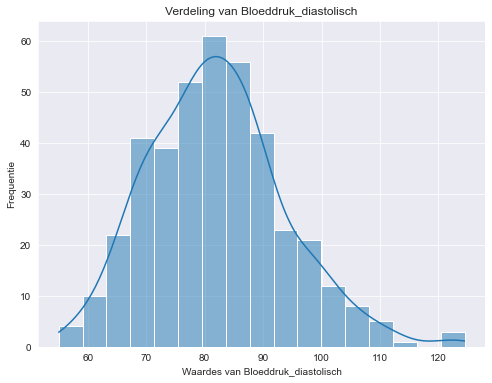

In [35]:
math.verdeling_c('Bloeddruk_diastolisch')

Zoals te zien is, is de waarde net aan normaal verdeeld. Dit is op basis van een vaak genomen grenswaarde van 0.5. Als de skewness van de grafiek deze grenswaarde overschrijdt op het positieve spectrum is de grafiek rechtsscheef. Als de skewness van de grafiek een waarde heeft van -0.5 of lager zou de grafiek worden gezien als linksscheef. Omdat de skewness van de grafiek 0.499 is, ligt het net op de grenswaarde en daardoor wordt de grafiek gezien als normaal verdeeld.

De volgende stap is om te kijken of ook het gemiddelde en de standaarddeviatie kloppen.

In [36]:
print(f'Het gemiddelde van Bloeddruk_diastolisch is: {math.dfstat.Mean.Bloeddruk_diastolisch}')
print(f'De standaard deviatie van Bloeddruk_diastolisch is: {math.dfstat.Std.Bloeddruk_diastolisch}')

Het gemiddelde van Bloeddruk_diastolisch is: 82.0225
De standaard deviatie van Bloeddruk_diastolisch is: 11.63046271251785


Door af te ronden op 1 decimaal kan er makkelijk gezien worden of de waardes zo overeenkomen. Dit lijkt te kloppen, met een gemiddelde waarde van 82.0 en een standaard deviatie van 11.6 (wat afgerond 12 is) komen de waardes overeen met de bronnen. Dit betekent dat de dataset geen afwijkend beeld laat zien wat betreft de diastolische bloeddruk.

Nu deze informatie is bepaald kan er met de hand worden gekeken naar de kans op de fout van de tweede soort. De steekproef in de dataset wordt hierbij meegenomen, om de kans te berekenen. Hiervoor worden eerst de hypotheses opgesteld:

$H_0:$ $\mu = 90$<br>
$H_1:$ $\mu \neq 90$

Voor het toetsen van deze hypothese is de formule voor de z-toets bruikbaar:
$z = \frac{\overline{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$

Deze formule heeft de volgende variabelen (er is afgerond voor simpliciteit):<br>
$\overline{x}:$ Het steekproefgemiddelde, $82$<br>
$\mu:$ Het (gegeven) populatiegemiddelde, $90$<br>
$\sigma:$ Standaard deviatie van de populatie, $12$<br>
$n:$ De steekproefomvang, $400$<br>

Ook is er een $\alpha$ van 0.05. Dit, in combinatie met de normale verdeling van de variabele, geeft aan dat dat we zoeken naar de z-score die de laatste $2.5\%$ van beide staarten omvat. Bij een $\alpha$ van 0.05 hoort een waarde van $1 - (\frac{0.05}{2}) = 0.975$, deze waarde is, volgens de [Z-score Tabel](https://www.z-table.com/) ongeveer gelijk aan 1.96. Dit is de grenswaarde van de z-toets die uitgevoerd gaat worden.

Na het verzamelen van alle gegevens verloopt de berekening als volgt:

$z = \frac{\overline{x} - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{82 - 90}{\frac{12}{20}} = \frac{-8}{\frac{12}{20}}$

Delen door een breuk is gelijk aan vermenigvuldigen met het omgekeerde, dus de berekening gaat als volgt verder:

$z = \frac{-8}{\frac{12}{20}} = -8 * \frac{20}{12} = \frac{-160}{12} = -13\frac{1}{3}$

De waarde van $-13\frac{1}{3}$ is zeer ongebruikelijk en laag, daarnaast overschrijdt de waarde van de z-toets de grenswaarde 1.96. Deze berekende waarde is ook niet te vinden in de [Z-score Tabel](https://www.z-table.com/), waarbij de laagste waarde van -3.49 een kans van $0.02\%$ betreft. Er kan vanuit worden gegaan dat, sinds $-13\frac{1}{3}$ meer dan 3 maal zo laag is als -3.49, de kans nog lager zal liggen dan $0.02\%$. Dit geeft aan dat de kans op een fout van de tweede soort extreem dicht tegen de $0\%$ ligt. 

Dit betekent dat de kans dat de nulhypothese zal worden verworpen, als het gemiddelde afwijkt van 90. Dit komt omdat de waarschijnlijkheid dat een significant verschil gemist zal worden in de steekproefgegevens nagenoeg $0\%$ is.

[Terug naar het begin](#begin)

--------------------

## Suikerziekte en BMI <a name='suiker'></a>

Nu word er gekeken of er een verschil zit bij de waarden van 'BMI_waarde' als er een andere categorie is bij 'Suikerziekte'. Suikerziekte heeft als mogelijke waardes de volgende uitkomsten: {0 : ja, 1 : nee}. Het doel is dus om te kijken of er een significant verschil zit bij de BMI van mensen met suikerziekte ten opzichte van mensen zonder suikerziekte. De volgende hypotheses zijn bij dit vraagstuk opgesteld:

$H_0:$ De gemiddelde waarde van BMI is hetzelfde voor de categorieën van 'Suikerziekte'<br>
$H_1:$ De gemiddelde waarde van BMI is verschillend voor de categorieën van 'Suikerziekte'

Met de huidige kennis van het probleem en de waardes van suikerziekte kan, met behulp van python, de p-waarde worden berekend 

In [37]:
# Splitsen van data voor veschillende Suikerziekte-categorieën
sz_ja = df[df['Suikerziekte'] == 0]['BMI_waarde']
sz_nee = df[df['Suikerziekte'] == 1]['BMI_waarde']

# T-test uitvoeren
t, p_waarde = stats.ttest_ind(sz_ja, sz_nee)

alpha = 0.05

# Bekijk de resultaten
if p_waarde < alpha:
    print('De nulhypothese wordt verworpen omdat de '
            f'P-waarde {p_waarde} kleiner is dan alpha {alpha}')
else:
    print('De nulhypothese wordt behouden omdat de '
            f'P-waarde {p_waarde} groter is dan alpha {alpha}')

De nulhypothese wordt behouden omdat de P-waarde 0.3278294559424343 groter is dan alpha 0.05


Uit de gebruikte code blijkt dat er onvoldoende bewijs is om de nulhypothese te verwerpen. Dit betekent dat er in de dataset geen verschil zit tussen de verschillende categorieën van 'Suikerziekte' en de gemiddelde waardes van 'BMI_waarde'.

[Terug naar het begin](#begin)